<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/19_RNN2_imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 호출


In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt



Using TensorFlow backend.


### seed 값 설정


In [0]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)



### 학습셋, 테스트셋 지정하기


In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)



17465344/17464789 [==============================] - 2s 0us/step


### 데이터 전처리


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)



### 모델의 설정


In [5]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

### 모델의 컴파일


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



### 모델의 실행


In [7]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.4510 - accuracy: 0.7669 - val_loss: 0.3347 - val_accuracy: 0.8520
Epoch 2/5
25000/25000 [==============================] - 22s 877us/step - loss: 0.2879 - accuracy: 0.8787 - val_loss: 0.3270 - val_accuracy: 0.8589
Epoch 3/5
25000/25000 [==============================] - 22s 877us/step - loss: 0.2469 - accuracy: 0.9012 - val_loss: 0.3336 - val_accuracy: 0.8566
Epoch 4/5
25000/25000 [==============================] - 22s 875us/step - loss: 0.2088 - accuracy: 0.9181 - val_loss: 0.3473 - val_accuracy: 0.8542
Epoch 5/5
25000/25000 [==============================] - 22s 878us/step - loss: 0.1785 - accuracy: 0.9304 - val_loss: 0.3576 - val_accuracy: 0.8514


### 테스트 정확도 출력


In [8]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))




25000/25000 [==============================] - 5s 220us/step

 Test Accuracy: 0.8514


### 테스트 셋의 오차


In [0]:
y_vloss = history.history['val_loss']



### 학습셋의 오차


In [0]:
y_loss = history.history['loss']



### 그래프로 표현


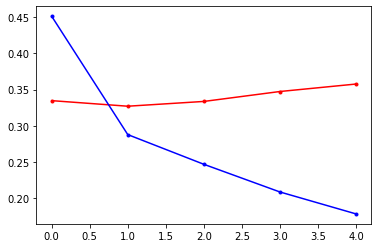

In [11]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')



### 그래프에 그리드를 주고 레이블을 표시


No handles with labels found to put in legend.


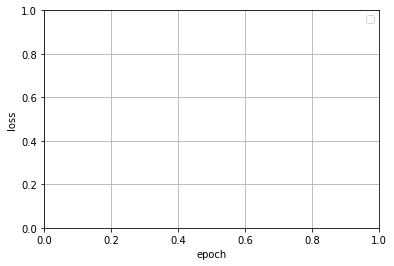

In [12]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
